In [1]:
import pkg_resources
try:
    pkg_resources.require(['eth-ape','ape-alchemy','ape-etherscan','mplfinance', 'pandas', 'numpy', 'python-dotenv'])
    print('All packages installed')
except:
    !pip3 install eth-ape ape-alchemy ape-etherscan mplfinance pandas numpy python-dotenv

All packages installed


In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import typing as tp
from ape import accounts, chain, Contract, networks

/Users/handu/opt/anaconda3/envs/crypto/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# manually input your keys like this
# %env WEB3_ALCHEMY_API_KEY = xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# %env ETHERSCAN_API = xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# or load from a separate ".env" file, which is more secure!
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
context = networks.parse_network_choice('ethereum:mainnet:https://mainnet.infura.io/v3/a00555d697a0423785aa7a966d88701a')
context.__enter__()
print(f"ape version: {pkg_resources.get_distribution('eth-ape').version}")
print(f"provider.config of type={type(context.provider.config)}")
for k,v in context.provider.config.Config.__dict__.items():
    if not k.startswith('__'):
        print(f" {k} = {v}")


INFO: Connecting to existing Geth node at  https://mainnet.infura.io/v3/a00555d697a0423785aa7a966d88701a.
ape version: 0.6.8
provider.config of type=<class 'ape_geth.provider.GethConfig'>
 extra = allow


In [5]:
for plugin_name, ecosystem_class in context.plugin_manager.providers:
    print(f"plugin_name={plugin_name}, ecosystem_class={ecosystem_class}")

plugin_name=alchemy, ecosystem_class=('ethereum', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('ethereum', 'goerli', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('ethereum', 'sepolia', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('arbitrum', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('arbitrum', 'goerli', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('optimism', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('optimism', 'goerli', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('polygon', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('polygon', 'mumbai', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=geth, ecosystem_class=('ethereum', 'mainnet', <class 'ape_geth.provider.Geth'>)
plugi

In [6]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [7]:
# get the balance of account 0
dev.balance

0

In [8]:
current_block = chain.blocks[-1].number
current_block

17067670

In [9]:
# determine starting block for the query
dblocks = int(86400*90/12) # last 180 d
start_block = current_block - dblocks
start_block

16419670

In [55]:
_3pool = Contract("0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7")

In [56]:
_3pool.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [146]:
%time recent_tx = _3pool.TokenExchange.query("*", start_block=current_block-30000) # last 10 hr
recent_tx

CPU times: user 380 ms, sys: 25.7 ms, total: 405 ms
Wall time: 600 ms


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x80d4230c0a68FC59cb264329D3a717FCA...,0xf958a789a2e4c8873b76eaf95602487443a5f199c8b5...,17037680,0x5e8d6c2c07bd15f00653ccdf91d79875056b4741189a...,2,0
1,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x0000000000a84D1a9B0063A910315C7fF...,0x6efe463d58acdd320a271d079fe6d0962022cac11ae1...,17037680,0x5e8d6c2c07bd15f00653ccdf91d79875056b4741189a...,15,4
2,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x99a58482BD75cbab83b27EC03CA68fF48...,0x453aa3df69de1a5641152c95feaad41fd7c1c754b0e4...,17037704,0x6bfb177f2c06a17c3fc76eb30dfe33bfefd093ba42b8...,241,93
3,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x99a58482BD75cbab83b27EC03CA68fF48...,0x85ba1198475b93a0e78ed18c6def2bc138e453141f7e...,17037762,0xd61ddd741f372e2181f620d955c565d3d93f7529daed...,57,46
4,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x99a58482BD75cbab83b27EC03CA68fF48...,0x8b1d2844c1e48576b1d0014c7869045693669957cbf2...,17037766,0x499f978c898a309a68533637364eb78871868f478438...,68,28
...,...,...,...,...,...,...,...,...
809,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0xE3b04E2416DFA8dfb6C6F595828934cE9...,0x9134ecacffbccd1b3a097ec2d21309b2cddd893c74f0...,17067986,0x1af88fa93176321407837394b293a68fc55679eda895...,174,69
810,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x1136B25047E142Fa3018184793aEc68fB...,0x71bce3bb62fb17073a09df333e4afa0bc603e9238735...,17068024,0xb8ea5475ab09b0b584d98d54a48cd1ce41c8a16e1474...,307,152
811,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x99a58482BD75cbab83b27EC03CA68fF48...,0xe5df6170b88f52c196d05beb40f587fd94c593ff59c0...,17068051,0x0729bfa91e6c047e7ef3f2496c38e43b9f29c9db61e1...,85,26
812,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x99a58482BD75cbab83b27EC03CA68fF48...,0x84a5890e008b595cc8bfb499fdd89d483959043f7cf3...,17068121,0x769630f0cb83ea5f722cced636420d11444f9447b144...,39,19


In [30]:
type(recent_tx["event_arguments"])

pandas.core.series.Series

In [31]:
recent_tx["event_arguments"].iloc[-1]

{'buyer': '0x4a14347083B80E5216cA31350a2D21702aC3650d',
 'sold_id': 1,
 'tokens_sold': 1490000000,
 'bought_id': 0,
 'tokens_bought': 1489944800739760588249}

In [58]:
# ok great. let's look a bit further into the past to start_block from above. see how long it takes
%time all_tx = _3pool.TokenExchange.query("*", start_block=start_block)
all_tx

ProviderError: query returned more than 10000 results. Try with this block range [0x10057B6, 0x1006936].

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xbe4b1d84830d1151ffaa7e0a699623fea67f76001c8a...,16419671,0x52d975f9e72ef5bba66dac9f5ba9601e8750aa8e0d51...,169,99
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xe09801dA4C74e62fB42DFC8303a1C1BD6...,0x899938fc0b14fe892a19418ce5e8dfe0c283215ca3b8...,16419673,0x8750e2e9f0c0e9b767a34790b8fd19cf7775a7facb35...,157,71
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xedAe76E579A3aCf71Dc11250D70b1A4f8...,0x6980b15c7a8138b19078c3e81548d73be2d0aa989ccd...,16419691,0x7c31b0e54822cfe6cf1b9a650a826580e5ec48f99f7a...,153,72
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x92a18dd5CcA31a2B17071f381ab336b72...,0x0b02e716bc50d7051e64203114f6b33fb688f71b5403...,16419697,0x22eb47f3903d0df947fcbbc4a46d28e17d72724f1c17...,298,141
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x555B6eE8faB3DfdBcCa9121721c435FD4...,0x52c72585038625fa91a421d4d485a5dcf4e5bf7dc645...,16419698,0xb90a6cba89e16405b426cd404625813787e7a40104b0...,199,91
...,...,...,...,...,...,...,...,...
13253,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x1136B25047E142Fa3018184793aEc68fB...,0xdec83a86ed81f12c61344f9d50690f45ce17b70edbbc...,17067489,0x9a393a4804b93cd53d540e0d6d82f81d1deaafeb8a79...,50,13
13254,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x9A7E631181F38384737EB39Ef9A39A747...,0x094e14ac81e342b7612c9c8147d28c0cd5055db3a011...,17067577,0xda28458e11989d5ea68c8e66314e35861b43e3982674...,236,85
13255,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x99a58482BD75cbab83b27EC03CA68fF48...,0x05e91046ba63b036abc0b25c9e20c51c00907e1dc37d...,17067579,0xc654cf6717da6e3a432da0155fdfc9b1235120be5b10...,209,29
13256,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x14a48D8580b1c5941368e6F35A54023fd...,0xa809d2bc1995a5c489b98a46c4bfa3622bbe7029f8ce...,17067685,0xcc1711d65449ea189b37cb11d3154657a5cc0d764474...,195,83


In [110]:
_3pool.coins

coins(uint256 arg0) -> address

In [111]:
# get coin indices:
#  - 0 = DAI (native)
#  - 1 = USDC
#  - 2 = USDT
coin_indices = [_3pool.coins(i) for i in range(3)]
coin_indices

['0x6B175474E89094C44Da98b954EedeAC495271d0F',
 '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48',
 '0xdAC17F958D2ee523a2206206994597C13D831ec7']

In [112]:
_3pool.address

'0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7'

In [113]:
# cache the fee to calculate associated price correctly (prior to fees applied)
_3pool_fee = _3pool.fee() / 1e10  # fee denom is 1e10
_3pool_fee

0.0001

In [155]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = recent_tx["event_arguments"].iloc[-3]
print('last swap event:', last_swap)
pricearr = [-1,-1,-1]
pricearr[last_swap['sold_id']] = last_swap['tokens_sold']
pricearr[last_swap['bought_id']] = last_swap['tokens_bought']

if pricearr[0] == -1 or pricearr[1] == -1:
    print('different pair than expected DAI/USDC')
    last_price = -1
else:
    last_price = pricearr[0]/pricearr[1]
    if last_swap['sold_id'] == 1:
        last_price *= (1 + _3pool_fee)
    else:
        last_price *= 1/(1 + _3pool_fee)
    last_price /= 1e12
    print('price:', last_price)


last swap event: {'buyer': '0x99a58482BD75cbab83b27EC03CA68fF489b5788f', 'sold_id': 1, 'tokens_sold': 1590201714, 'bought_id': 0, 'tokens_bought': 1590156302035366106551}
price: 1.0000714397831227


In [156]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    pricearr = [-1,-1,-1]

    pricearr[event_args['sold_id']] = event_args['tokens_sold']
    pricearr[event_args['bought_id']] = event_args['tokens_bought']

    if pricearr[0] == -1 or pricearr[1] == -1:
        print('different pair than expected DAI/USDC')
        price = -1
        return price
    else:
        price = pricearr[0]/pricearr[1]
        if event_args['sold_id'] == 1:
            price *= (1 + _3pool_fee)
        else:
            price *= 1/(1 + _3pool_fee)
    return price/1e12

In [157]:
last_price

1.0000714397831227

In [158]:
get_price(recent_tx["event_arguments"].iloc[-3])

1.0000714397831227

In [159]:
# validate with logic in cell above for last price
get_price(recent_tx["event_arguments"].iloc[-3]) == last_price

True

In [181]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
recent_tx['price (DAI/USDC)'] = recent_tx['event_arguments'].apply(get_price)
recent_tx = recent_tx[recent_tx['price (DAI/USDC)'] !=-1]
recent_tx

/var/folders/yh/xl0g1ncn2zx7nryj7xt282m80000gn/T/ipykernel_37123/405615186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_tx['price (DAI/USDC)'] = recent_tx['event_arguments'].apply(get_price)


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (DAI/USDC),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
39,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x17dd5d10028f45ba5450b601be3d51db0e099d442c89...,17038941,0xfa919eff25c8ab26f0b0639a2c578fa03a2c31b067da...,27,10,1.000013,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,40500000000,0,40496465295070250342612,40496.465295,4.050000e-08
45,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x61544e142629384c571851f05526bab5a4d8728cc00c...,17039232,0x096438e56d73754a1efb50617b1e1c2e28a0cd0ce8a3...,119,41,1.000012,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,188000000,0,187983528031279335353,187.983528,1.880000e-10
66,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0xf0510400fa51ff34f8dc16b8d2783b916f1699162c3c...,17039741,0xf3692ba00db346128245cca52aa4af36ef007f6b4bd9...,30,14,1.000010,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,104000000,0,103990643122125118384,103.990643,1.040000e-10
69,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0xc6b064463675858b7f164ae3c6bf90df728143a52e6a...,17039802,0x3cb75120f27c29ef64f2b250089d945fc534c328ccc5...,169,50,1.000010,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,500000000,0,499955138105269285559,499.955138,5.000000e-10
72,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6ea84136445d1220e56afa1546d103aa70b609f32d80...,17039895,0x41bbbd863547254874a97d41d85c6f6ff3fc7dcd976b...,158,43,1.000011,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,1670000000,0,1669850860564068705700,1669.850861,1.670000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6ab37d08bb0c84470c9a4b2b2647a340ecbbe19ed3a7...,17064255,0xcd1536cecda76f70018a94300811b2a3e6824f733738...,71,51,1.000016,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,5200000000,0,5199563144745530142622,5199.563145,5.200000e-09
721,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x42653c8b9ccb527724711711ce25d86db4c3bc21307f...,17064267,0xa38da75ab951f1afd1c37633a6572949b1464d61d614...,100,40,1.000016,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,130000000,0,129989076703095948357,129.989077,1.300000e-10
730,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6abf75186477c59b660e983c4550971aaa85f2900839...,17064647,0xb798b67bb85a7a830270e422a7b49bf77f11e1fc22cb...,72,22,1.000018,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,105000000,0,104991392501213425852,104.991393,1.050000e-10
804,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x692cb2e126fa83197932e5d84085ff0db75797f985d0...,17067796,0x27a798c1f204808a3167304ea89aa627c68559d7eaaa...,109,42,1.000063,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,1490000000,0,1489944800739760588249,1489.944801,1.490000e-09


<Axes: xlabel='block_number'>

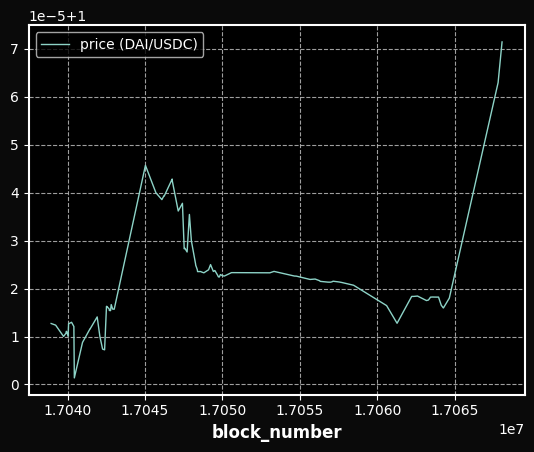

In [182]:
recent_tx[recent_tx['price (DAI/USDC)']!=-1].plot(x='block_number', y='price (DAI/USDC)')

In [183]:
# first, unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict):
    return event_args[key]

for key in recent_tx.iloc[-1]['event_arguments'].keys():
    recent_tx[key] = recent_tx['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [184]:
recent_tx

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (DAI/USDC),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
39,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x17dd5d10028f45ba5450b601be3d51db0e099d442c89...,17038941,0xfa919eff25c8ab26f0b0639a2c578fa03a2c31b067da...,27,10,1.000013,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,40500000000,0,40496465295070250342612,40496.465295,4.050000e-08
45,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x61544e142629384c571851f05526bab5a4d8728cc00c...,17039232,0x096438e56d73754a1efb50617b1e1c2e28a0cd0ce8a3...,119,41,1.000012,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,188000000,0,187983528031279335353,187.983528,1.880000e-10
66,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0xf0510400fa51ff34f8dc16b8d2783b916f1699162c3c...,17039741,0xf3692ba00db346128245cca52aa4af36ef007f6b4bd9...,30,14,1.000010,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,104000000,0,103990643122125118384,103.990643,1.040000e-10
69,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0xc6b064463675858b7f164ae3c6bf90df728143a52e6a...,17039802,0x3cb75120f27c29ef64f2b250089d945fc534c328ccc5...,169,50,1.000010,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,500000000,0,499955138105269285559,499.955138,5.000000e-10
72,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6ea84136445d1220e56afa1546d103aa70b609f32d80...,17039895,0x41bbbd863547254874a97d41d85c6f6ff3fc7dcd976b...,158,43,1.000011,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,1670000000,0,1669850860564068705700,1669.850861,1.670000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6ab37d08bb0c84470c9a4b2b2647a340ecbbe19ed3a7...,17064255,0xcd1536cecda76f70018a94300811b2a3e6824f733738...,71,51,1.000016,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,5200000000,0,5199563144745530142622,5199.563145,5.200000e-09
721,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x42653c8b9ccb527724711711ce25d86db4c3bc21307f...,17064267,0xa38da75ab951f1afd1c37633a6572949b1464d61d614...,100,40,1.000016,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,130000000,0,129989076703095948357,129.989077,1.300000e-10
730,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6abf75186477c59b660e983c4550971aaa85f2900839...,17064647,0xb798b67bb85a7a830270e422a7b49bf77f11e1fc22cb...,72,22,1.000018,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,105000000,0,104991392501213425852,104.991393,1.050000e-10
804,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x692cb2e126fa83197932e5d84085ff0db75797f985d0...,17067796,0x27a798c1f204808a3167304ea89aa627c68559d7eaaa...,109,42,1.000063,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,1490000000,0,1489944800739760588249,1489.944801,1.490000e-09


In [185]:
# apply min size to swaps we care about to ignore the dustings
min_bought = 0.0001 * 1e18  # trade size must be > 0.0001 ETH 
recent_tx = recent_tx[recent_tx['tokens_bought'] > min_bought]

<Axes: xlabel='block_number'>

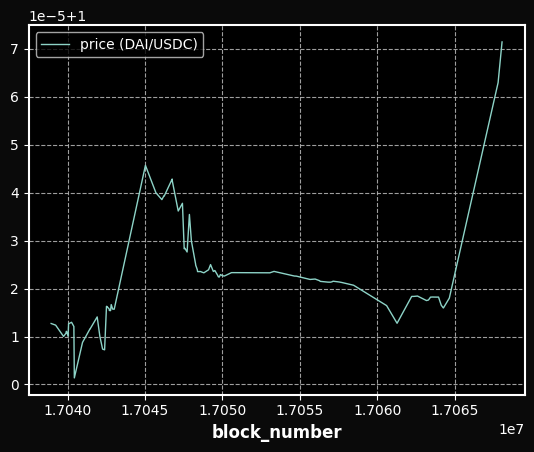

In [186]:
# nice! way better
recent_tx[recent_tx['price (DAI/USDC)'] != -1].plot(x='block_number', y='price (DAI/USDC)')

In [187]:
# write a function that returns volume on coin indices for a swap (normalized by 1e18 for decimals)
def get_volume(coin_index: int, x: pd.Series) -> (float, float):
    volume = x['tokens_sold'] if x['sold_id'] == coin_index else x['tokens_bought']
    volume = volume / 1e18
    return volume

In [188]:
%%capture
for coin_index in range(2):
    key = f'volume_coin{coin_index}'
    recent_tx[key] = recent_tx.apply(lambda x: get_volume(coin_index, x), axis=1)

In [189]:
recent_tx

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (DAI/USDC),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
39,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x17dd5d10028f45ba5450b601be3d51db0e099d442c89...,17038941,0xfa919eff25c8ab26f0b0639a2c578fa03a2c31b067da...,27,10,1.000013,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,40500000000,0,40496465295070250342612,40496.465295,4.050000e-08
45,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x61544e142629384c571851f05526bab5a4d8728cc00c...,17039232,0x096438e56d73754a1efb50617b1e1c2e28a0cd0ce8a3...,119,41,1.000012,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,188000000,0,187983528031279335353,187.983528,1.880000e-10
66,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0xf0510400fa51ff34f8dc16b8d2783b916f1699162c3c...,17039741,0xf3692ba00db346128245cca52aa4af36ef007f6b4bd9...,30,14,1.000010,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,104000000,0,103990643122125118384,103.990643,1.040000e-10
69,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0xc6b064463675858b7f164ae3c6bf90df728143a52e6a...,17039802,0x3cb75120f27c29ef64f2b250089d945fc534c328ccc5...,169,50,1.000010,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,500000000,0,499955138105269285559,499.955138,5.000000e-10
72,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6ea84136445d1220e56afa1546d103aa70b609f32d80...,17039895,0x41bbbd863547254874a97d41d85c6f6ff3fc7dcd976b...,158,43,1.000011,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,1670000000,0,1669850860564068705700,1669.850861,1.670000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6ab37d08bb0c84470c9a4b2b2647a340ecbbe19ed3a7...,17064255,0xcd1536cecda76f70018a94300811b2a3e6824f733738...,71,51,1.000016,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,5200000000,0,5199563144745530142622,5199.563145,5.200000e-09
721,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x42653c8b9ccb527724711711ce25d86db4c3bc21307f...,17064267,0xa38da75ab951f1afd1c37633a6572949b1464d61d614...,100,40,1.000016,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,130000000,0,129989076703095948357,129.989077,1.300000e-10
730,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x6abf75186477c59b660e983c4550971aaa85f2900839...,17064647,0xb798b67bb85a7a830270e422a7b49bf77f11e1fc22cb...,72,22,1.000018,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,105000000,0,104991392501213425852,104.991393,1.050000e-10
804,TokenExchange,0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7,{'buyer': '0x4a14347083B80E5216cA31350a2D21702...,0x692cb2e126fa83197932e5d84085ff0db75797f985d0...,17067796,0x27a798c1f204808a3167304ea89aa627c68559d7eaaa...,109,42,1.000063,0x4a14347083B80E5216cA31350a2D21702aC3650d,1,1490000000,0,1489944800739760588249,1489.944801,1.490000e-09


In [190]:
# prep for smoothing by setting index to block number (choose last swap in block to represent price at block)
recent_tx_filtered = recent_tx.filter(['block_number', 'price (DAI/USDC)', 'volume_coin0', 'volume_coin1']).drop_duplicates('block_number', keep='last')
recent_tx_filtered = recent_tx_filtered.set_index('block_number')

In [191]:
# reindex by block number (1 block steps) and ffill price values 
new_index = range(recent_tx_filtered.index.min(), recent_tx_filtered.index.max()+1)
recent_tx_filtered = recent_tx_filtered.reindex(new_index).ffill()

In [192]:
# separate data into windows of 260 blocks (~ 1h)
# remove first (last_block - first_block) % window rows so even candle windows
window = 260
first_index = (recent_tx_filtered.index[-1] - recent_tx_filtered.index[0]) % window
recent_tx_filtered = recent_tx_filtered[first_index:]

In [193]:
# smooth data using mean over 260 blocks for ~ 1h candles
s = (recent_tx_filtered.index.to_series() / window).astype(int)
recent_tx_candled = recent_tx_filtered.groupby(s).agg({'price (DAI/USDC)': ['first', 'max', 'min', 'last', 'mean'], 'volume_coin0': 'sum', 'volume_coin1': 'sum'}).set_index(s.index[::window])
recent_tx_candled

price (DAI/USDC)                                          \
                        first       max       min      last      mean   
block_number                                                            
17039191             1.000013  1.000013  1.000012  1.000012  1.000012   
17039451             1.000012  1.000012  1.000012  1.000012  1.000012   
17039711             1.000012  1.000012  1.000010  1.000010  1.000011   
17039971             1.000010  1.000013  1.000010  1.000013  1.000011   
17040231             1.000013  1.000013  1.000013  1.000013  1.000013   
...                       ...       ...       ...       ...       ...   
17067011             1.000018  1.000018  1.000018  1.000018  1.000018   
17067271             1.000018  1.000018  1.000018  1.000018  1.000018   
17067531             1.000018  1.000018  1.000018  1.000018  1.000018   
17067791             1.000018  1.000063  1.000018  1.000063  1.000046   
17068051             1.000063  1.000071  1.000063  1.000071  1.000063   

              volume_coin0  volume_coin1  
                       sum           sum  
block_number                              
17039191      1.684417e+06  1.684564e-06  
17039451      4.887572e+04  4.888000e-08  
17039711      6.808594e+04  6.809200e-08  
17039971      3.635150e+06  3.635476e-06  
17040231      1.238140e+06  1.238248e-06  
...                    ...           ...  
17067011      2.729776e+04  2.730000e-08  
17067271      2.729776e+04  2.730000e-08  
17067531      2.729776e+04  2.730000e-08  
17067791      2.544301e+05  2.544400e-07  
17068051      1.371751e+05  1.371802e-07  

[112 rows x 7 columns]

<Axes: xlabel='block_number'>

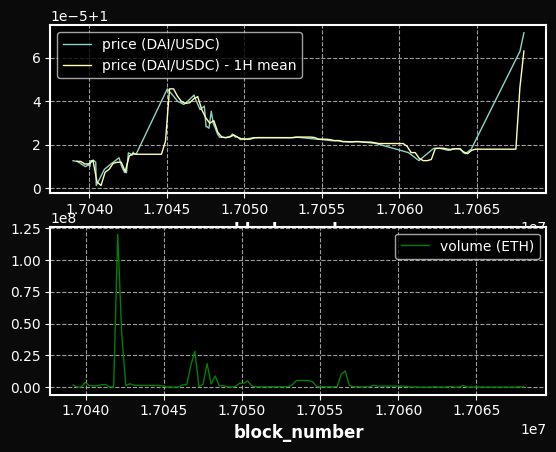

In [194]:
# make some fancy plots w subplots ...
fig, ax = plt.subplots(2, 1)
recent_tx.plot(x='block_number', y='price (DAI/USDC)', ax=ax[0])
recent_tx_candled['price (DAI/USDC)'].plot(y='mean', ax=ax[0], label='price (DAI/USDC) - 1H mean')
recent_tx_candled['volume_coin0'].plot(y='sum', color='g', ax=ax[1], label='volume (ETH)')

In [195]:
# plot the candles since that's dope :o

In [196]:
# get the timestamps every 24 candles (~ 24h) and interpolate the rest (SEE banteg gist again)
# NOTE: include last block in index for interp to work properly
T = 24
blocks = recent_tx_candled.index[::24].to_list() + [recent_tx_candled.index[-1]]

In [197]:
%time timestamps = [ chain.blocks[i].timestamp for i in blocks ]

CPU times: user 53.5 ms, sys: 5.91 ms, total: 59.4 ms
Wall time: 374 ms


In [198]:
recent_tx_candled['timestamp'] = pd.to_datetime(np.interp(recent_tx_candled.index, blocks, timestamps) * 1e9)
recent_tx_candled

price (DAI/USDC)                                          \
                        first       max       min      last      mean   
block_number                                                            
17039191             1.000013  1.000013  1.000012  1.000012  1.000012   
17039451             1.000012  1.000012  1.000012  1.000012  1.000012   
17039711             1.000012  1.000012  1.000010  1.000010  1.000011   
17039971             1.000010  1.000013  1.000010  1.000013  1.000011   
17040231             1.000013  1.000013  1.000013  1.000013  1.000013   
...                       ...       ...       ...       ...       ...   
17067011             1.000018  1.000018  1.000018  1.000018  1.000018   
17067271             1.000018  1.000018  1.000018  1.000018  1.000018   
17067531             1.000018  1.000018  1.000018  1.000018  1.000018   
17067791             1.000018  1.000063  1.000018  1.000063  1.000046   
17068051             1.000063  1.000071  1.000063  1.000071  1.000063   

              volume_coin0  volume_coin1               timestamp  
                       sum           sum                          
block_number                                                      
17039191      1.684417e+06  1.684564e-06 2023-04-13 14:52:35.000  
17039451      4.887572e+04  4.888000e-08 2023-04-13 15:46:45.000  
17039711      6.808594e+04  6.809200e-08 2023-04-13 16:40:55.000  
17039971      3.635150e+06  3.635476e-06 2023-04-13 17:35:05.000  
17040231      1.238140e+06  1.238248e-06 2023-04-13 18:29:15.000  
...                    ...           ...                     ...  
17067011      2.729776e+04  2.730000e-08 2023-04-17 14:12:31.800  
17067271      2.729776e+04  2.730000e-08 2023-04-17 15:05:32.600  
17067531      2.729776e+04  2.730000e-08 2023-04-17 15:58:33.400  
17067791      2.544301e+05  2.544400e-07 2023-04-17 16:51:34.200  
17068051      1.371751e+05  1.371802e-07 2023-04-17 17:44:35.000  

[112 rows x 8 columns]

In [199]:
# put data into new df for ohlcv with 1h candles
recent_tx_ohlcv = pd.DataFrame({
    'Open': recent_tx_candled['price (DAI/USDC)']['first'],
    'High': recent_tx_candled['price (DAI/USDC)']['max'],
    'Low': recent_tx_candled['price (DAI/USDC)']['min'],
    'Close': recent_tx_candled['price (DAI/USDC)']['last'],
    'Volume': recent_tx_candled['volume_coin0']['sum'],
    'Date': recent_tx_candled['timestamp']
})
recent_tx_ohlcv = recent_tx_ohlcv.set_index('Date')
recent_tx_ohlcv

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-13 14:52:35.000,1.000013,1.000013,1.000012,1.000012,1.684417e+06
2023-04-13 15:46:45.000,1.000012,1.000012,1.000012,1.000012,4.887572e+04
2023-04-13 16:40:55.000,1.000012,1.000012,1.000010,1.000010,6.808594e+04
2023-04-13 17:35:05.000,1.000010,1.000013,1.000010,1.000013,3.635150e+06
2023-04-13 18:29:15.000,1.000013,1.000013,1.000013,1.000013,1.238140e+06
...,...,...,...,...,...
2023-04-17 14:12:31.800,1.000018,1.000018,1.000018,1.000018,2.729776e+04
2023-04-17 15:05:32.600,1.000018,1.000018,1.000018,1.000018,2.729776e+04
2023-04-17 15:58:33.400,1.000018,1.000018,1.000018,1.000018,2.729776e+04


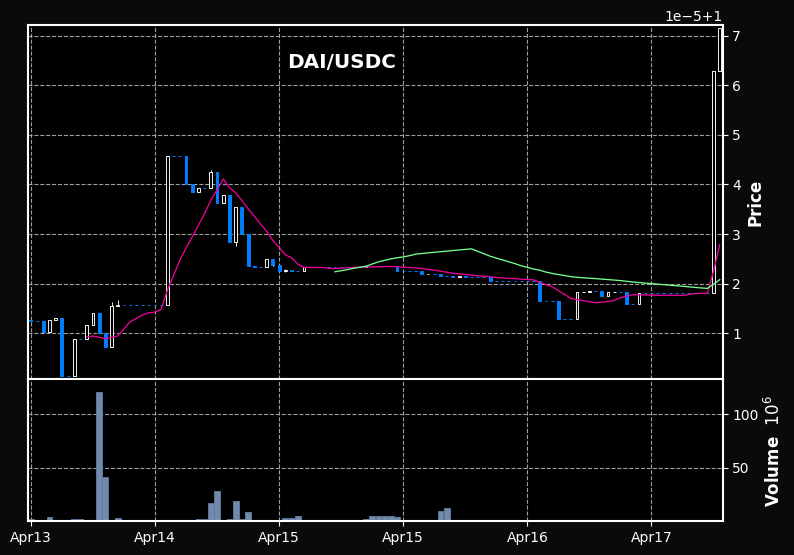

In [202]:
# oooooo fancy :)
def fancy_plot(
    data,
    mav=(10, 50),
    plt_type='candle',
    volume=True,
    datetime_format='%b%d',
    xrotation=0,
    tight_layout=True,
    style='mike', # mpf.available_styles() to pick your fav
    **kwargs
):
    mpf.plot(
        data,
        warn_too_much_data=2500,
        mav=mav,
        type=plt_type,
        volume=volume,
        datetime_format=datetime_format,
        xrotation=xrotation,
        tight_layout=tight_layout,
        style=style,
        **kwargs
    )

title="DAI/USDC"
fancy_plot(recent_tx_ohlcv, mav=(10, 50, 200), title=title)


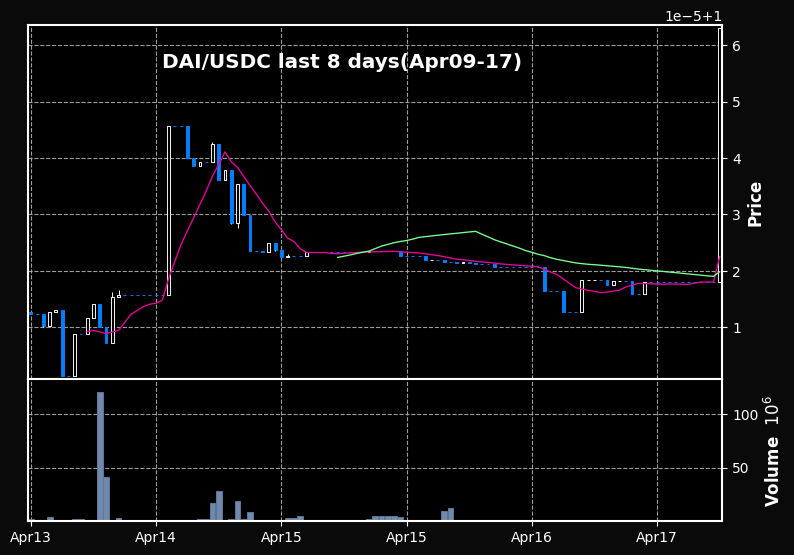

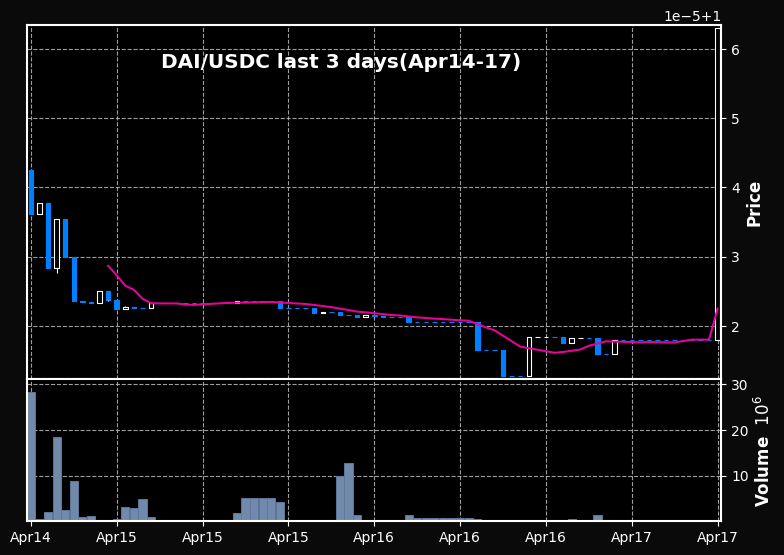

In [203]:
def plot_last_n_days(data, num_days_back=100, **kwargs):
    endPeriod = recent_tx_ohlcv.index[-1]
    startPeriod = endPeriod - pd.Timedelta(days=num_days_back)
    dataToPlot = data.loc[(data.index > startPeriod) & (data.index < endPeriod),:]
    title=f"DAI/USDC last {num_days_back} days"
    title+=f"({startPeriod:%b%d}-{endPeriod:%b%d})" if startPeriod.month != endPeriod.month else f"({startPeriod:%b%d}-{endPeriod:%d})"
    mav = [10]
    if num_days_back > 3:
        mav.append(50)
    if num_days_back > 10:
        mav.append(100)
    fancy_plot(dataToPlot, mav=mav, title=title)

plot_last_n_days(recent_tx_ohlcv, num_days_back=8)
plot_last_n_days(recent_tx_ohlcv, num_days_back=3)
